In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

In [3]:
# The Data¶
# We will be using data from a Kaggle data set:

# https://www.kaggle.com/harlfoxem/housesalesprediction

# Feature Columns
# id - Unique ID for each home sold
# date - Date of the home sale
# price - Price of each home sold
# bedrooms - Number of bedrooms
# bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
# sqft_living - Square footage of the apartments interior living space
# sqft_lot - Square footage of the land space
# floors - Number of floors
# waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
# view - An index from 0 to 4 of how good the view of the property was
# condition - An index from 1 to 5 on the condition of the apartment,
# grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
# sqft_above - The square footage of the interior housing space that is above ground level
# sqft_basement - The square footage of the interior housing space that is below ground level
# yr_built - The year the house was initially built
# yr_renovated - The year of the house’s last renovation
# zipcode - What zipcode area the house is in
# lat - Lattitude
# long - Longitude
# sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
df = pd.read_csv('../data/kc_house_data.csv')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21593,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


C:\Users\akash\AppData\Local\Temp\ipykernel_9460\4141105712.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

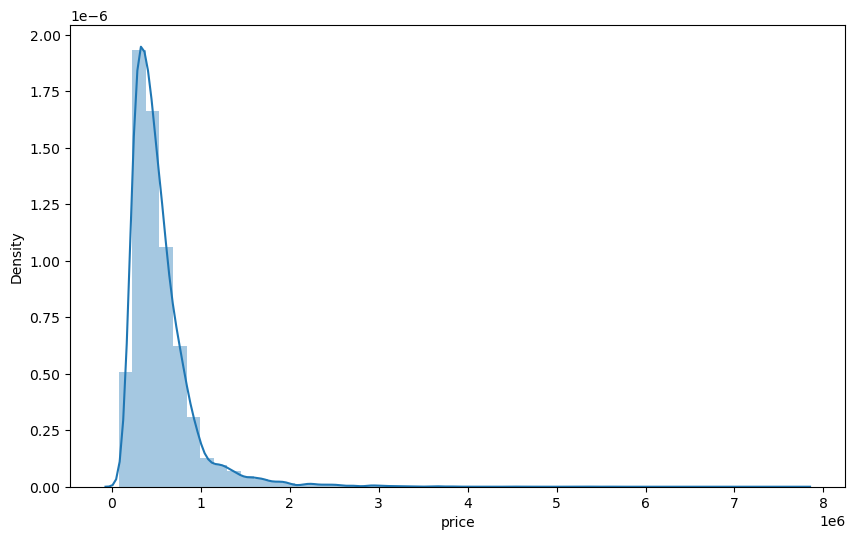

In [9]:
plt.figure(figsize=(10,6))
sns.distplot(df['price'])

C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


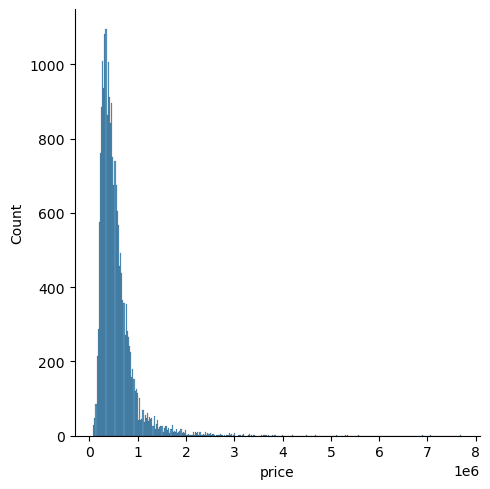

In [10]:
sns.displot(df['price'])

C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

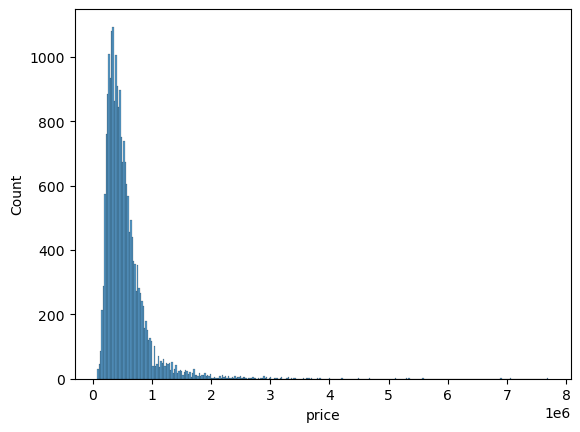

In [11]:
sns.histplot(df['price'])

<Axes: ylabel='count'>

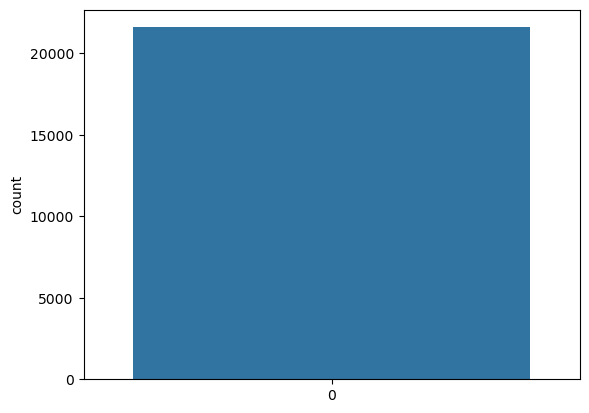

In [12]:
sns.countplot(df['bedrooms']) # method given in tutorial video

<Axes: >

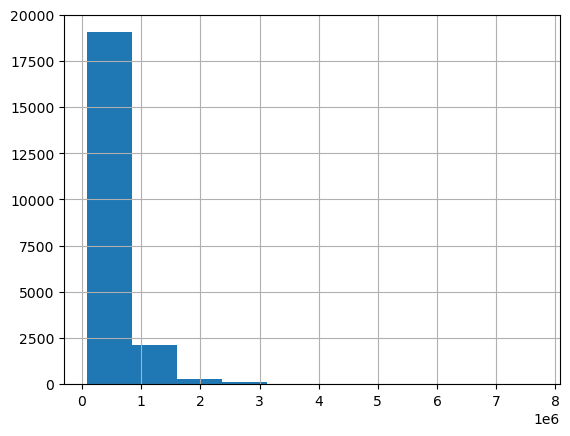

In [13]:
df['price'].hist() # method given in tutorial video's Q&A

C:\Users\akash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

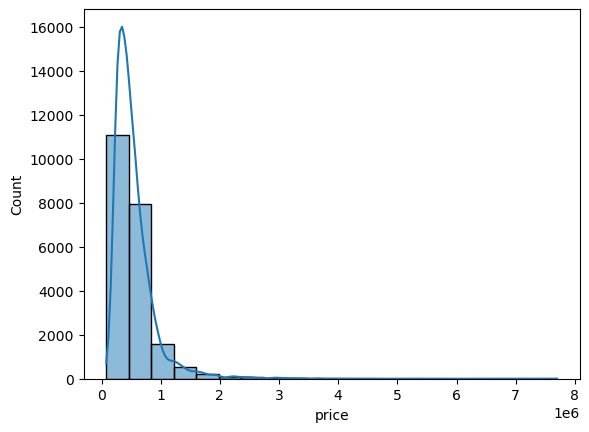

In [14]:
sns.histplot(data=df, x="price",bins=20, kde=True) # method given in tutorial video's Q&A

<Axes: xlabel='bedrooms', ylabel='count'>

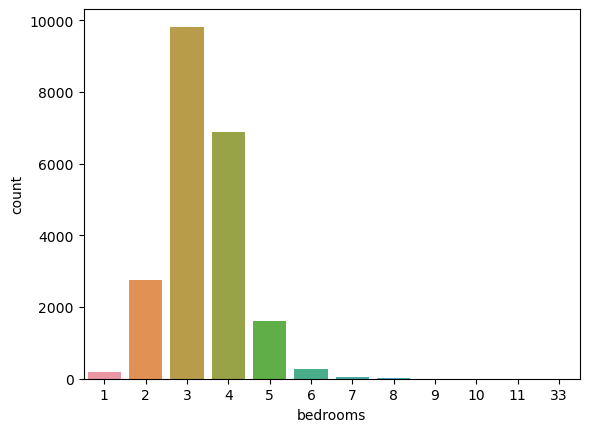

In [15]:
sns.countplot(x=df['bedrooms']) # method given in tutorial video's Q&A

<Axes: xlabel='bedrooms', ylabel='count'>

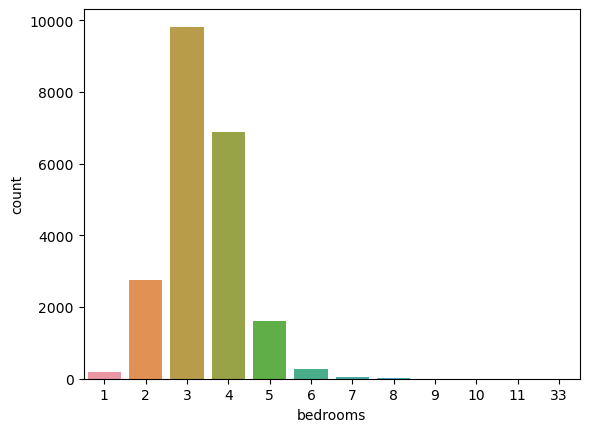

In [16]:
sns.countplot(data=df, x='bedrooms') # method given in tutorial video's Q&A

In [17]:
df.corr(numeric_only=True) # to see what correlates to the label 'price'. Will get error about 'can't convert string to float' without  numeric_only=True

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [18]:
df.corr(numeric_only=True)['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

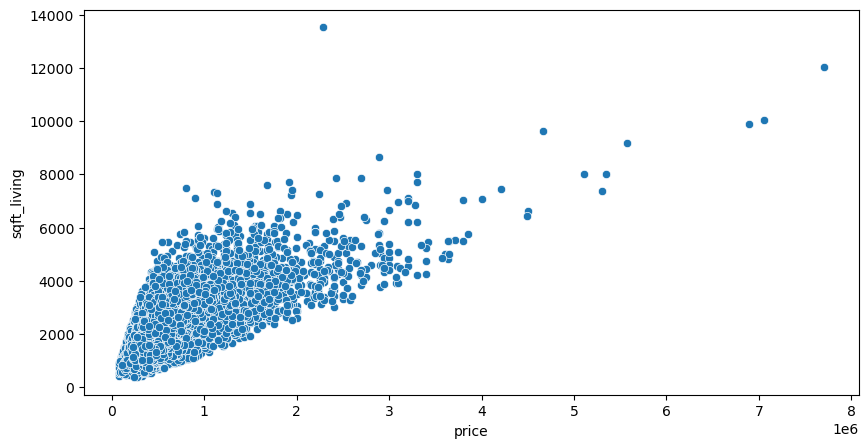

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price', y='sqft_living', data=df)

<Axes: xlabel='bedrooms', ylabel='price'>

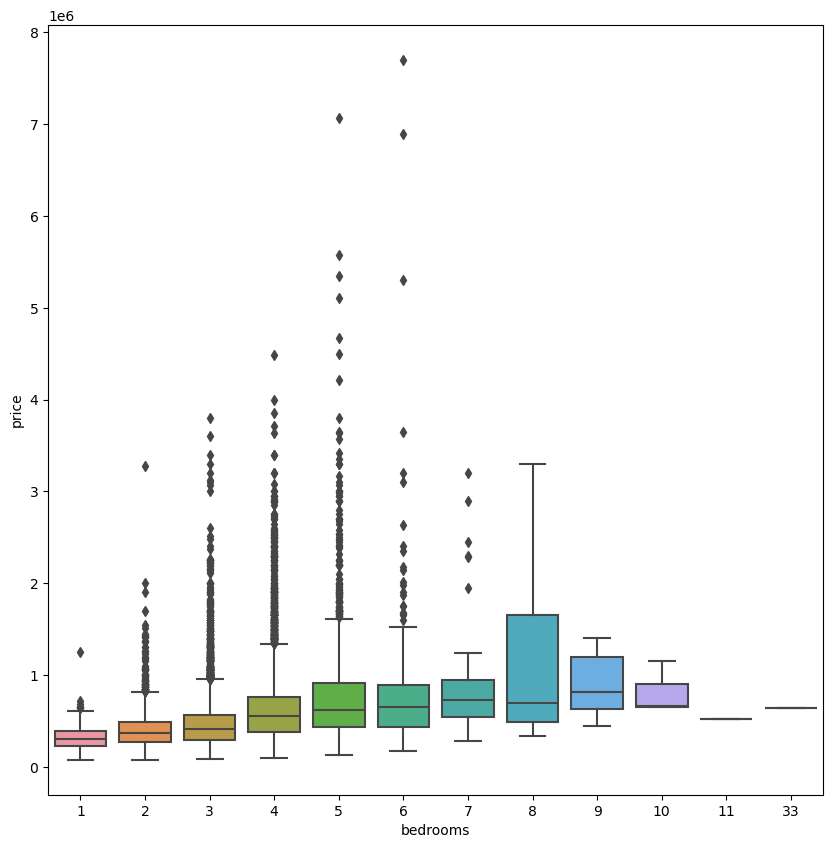

In [20]:
plt.figure(figsize=(10,10)) # width, height
sns.boxplot(x='bedrooms', y='price', data=df)

In [21]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<Axes: xlabel='price', ylabel='long'>

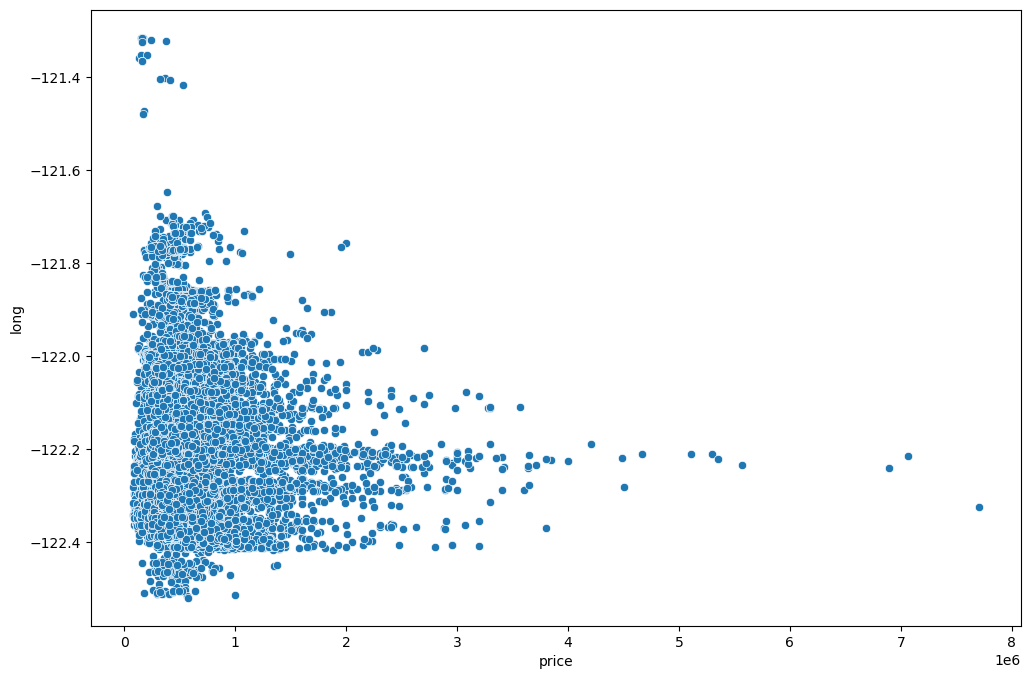

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='long', data=df)

<Axes: xlabel='price', ylabel='lat'>

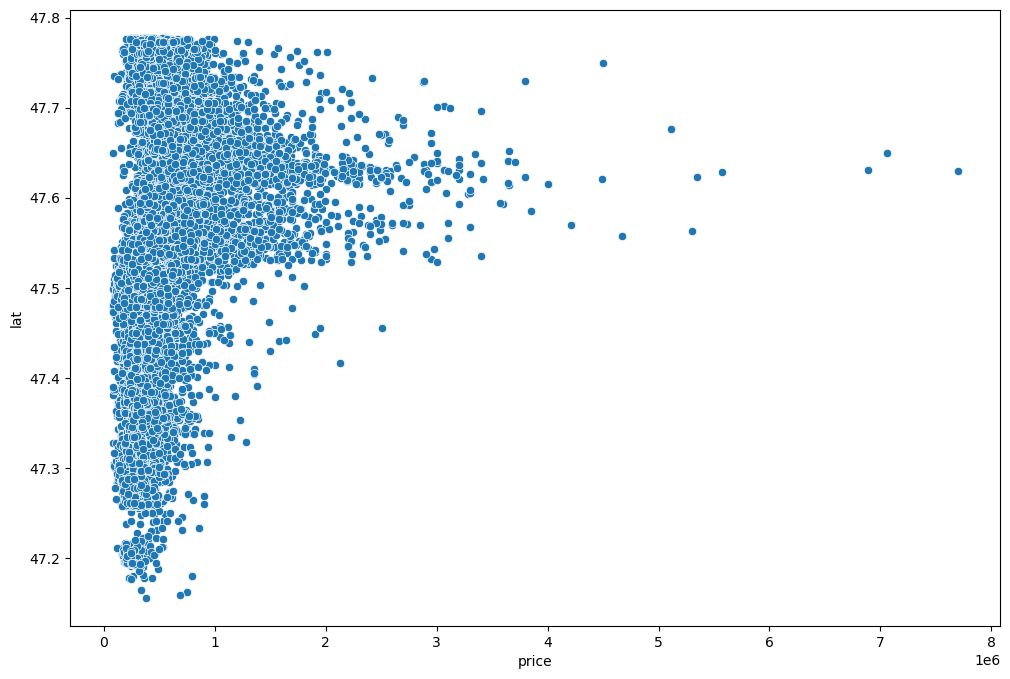

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

<Axes: xlabel='long', ylabel='lat'>

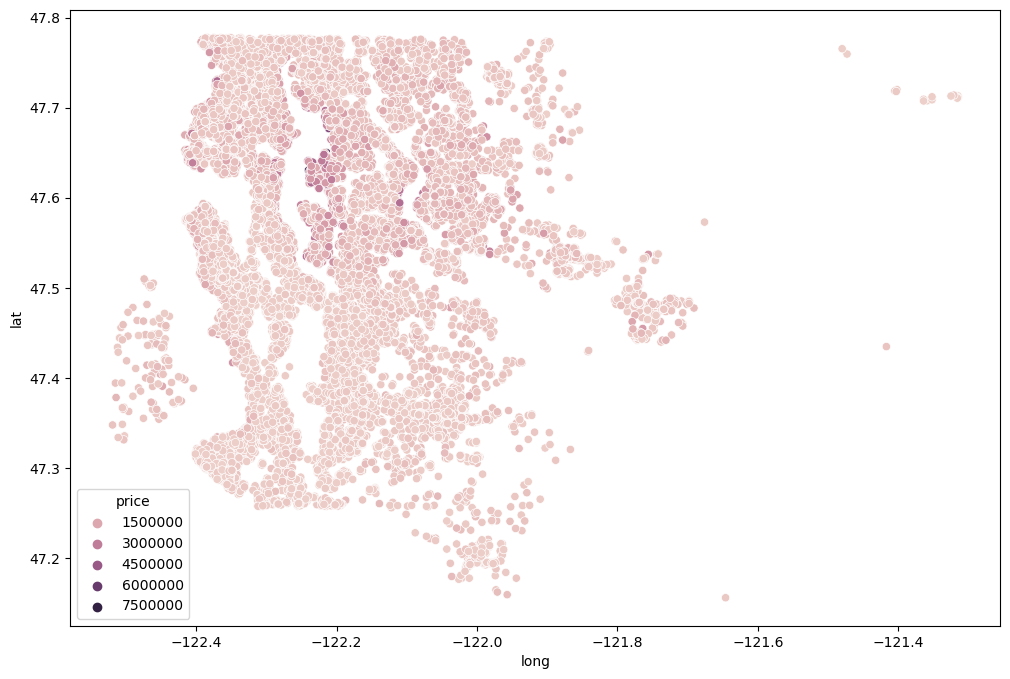

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df, hue='price') # data points layer on top of a map with same scale. But not much variation in the price colour.

In [25]:
df.sort_values('price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [26]:
len(df)

21597

<Axes: xlabel='long', ylabel='lat'>

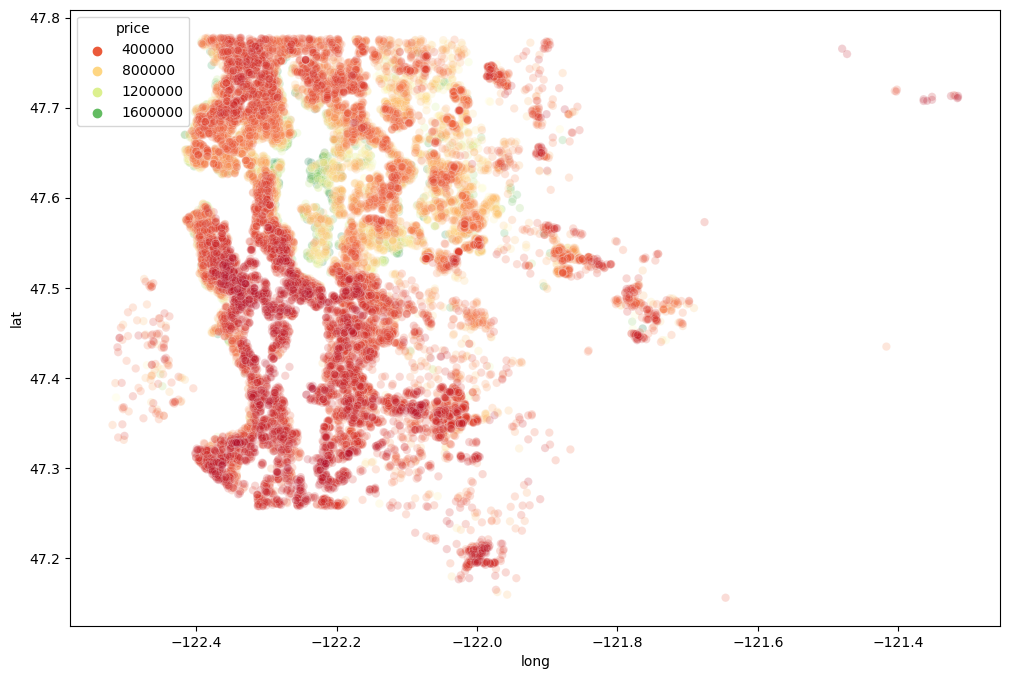

In [27]:
non_top_1_perc = df.sort_values('price', ascending=False).iloc[216:]
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=non_top_1_perc, alpha=0.2, palette='RdYlGn', hue='price') # data points are heatmap layer on top of a map of geographical area with same scale.

<Axes: xlabel='long', ylabel='lat'>

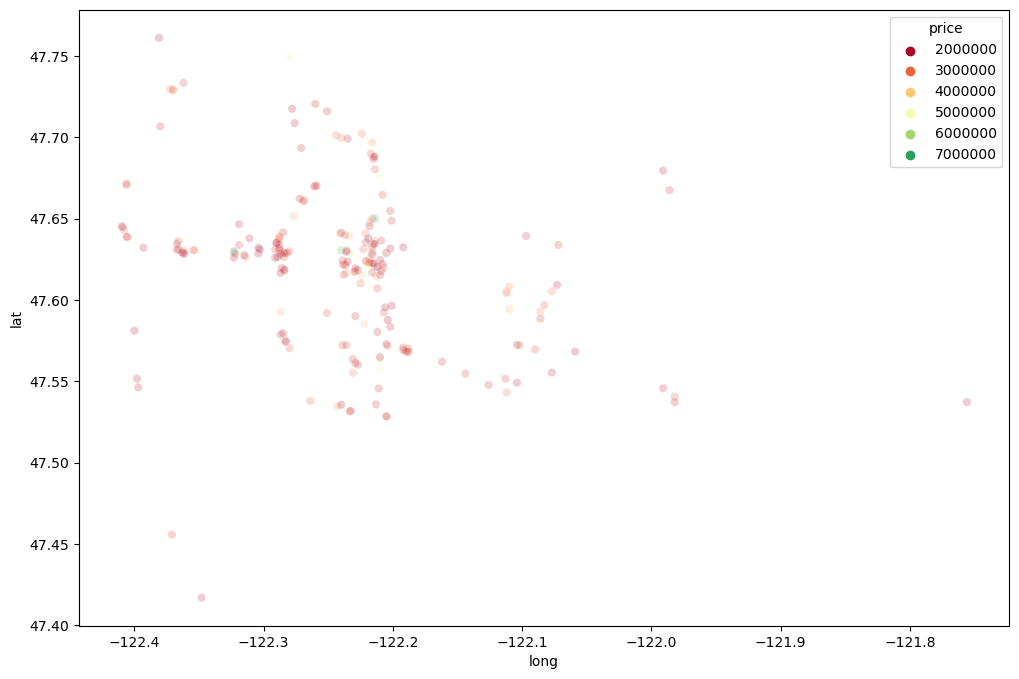

In [28]:
top_1_perc = df.sort_values('price', ascending=False).iloc[:217]
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=top_1_perc, alpha=0.2, palette='RdYlGn', hue='price') # data points layer on top of a map with same scale.

<Axes: xlabel='waterfront', ylabel='price'>

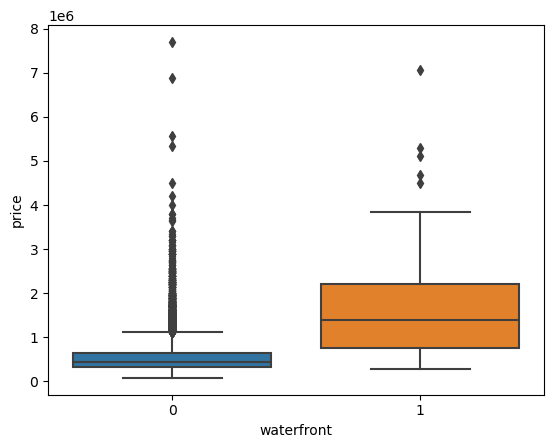

In [29]:
sns.boxplot(x='waterfront', y='price', data=df)

In [30]:

# Feature Engineering

In [31]:
df = df.drop('id', axis=1)

In [32]:
df['date'] = pd.to_datetime(df['date'])
type(df['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [33]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [34]:
# common step is to separate date into month and year features
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<Axes: xlabel='month', ylabel='price'>

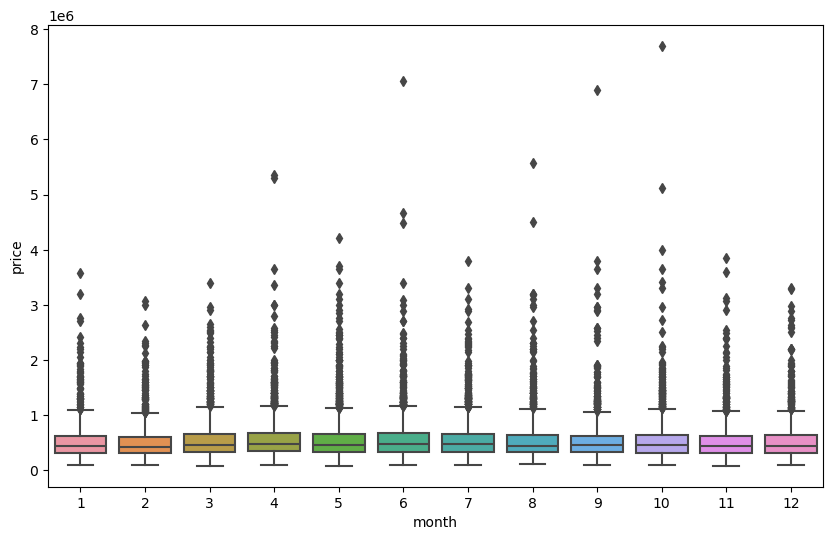

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month', y='price', data=df)

<Axes: xlabel='month'>

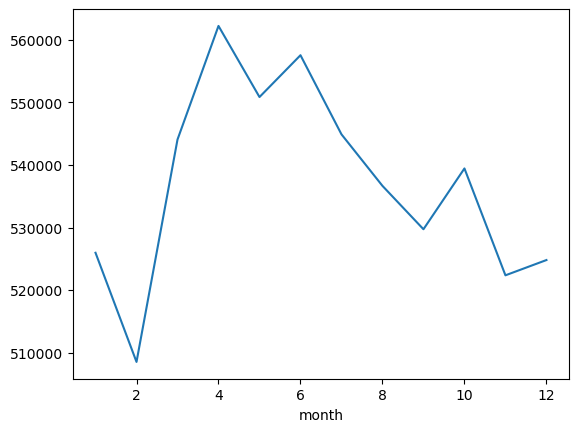

In [36]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

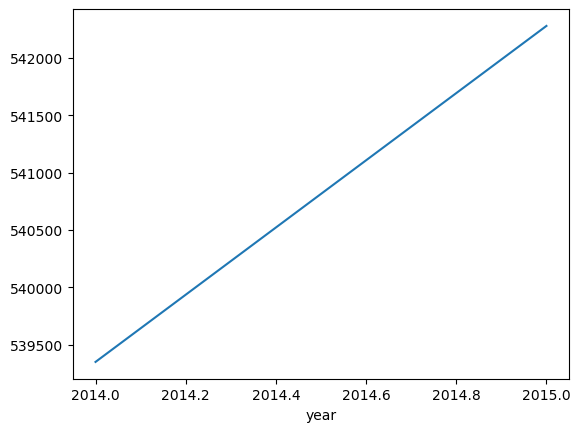

In [37]:
df.groupby('year').mean()['price'].plot() # slope of curve is natural. Steady growth due to inflation, though there are only two data points [2014, 2015].

In [38]:
df['year'].describe()

count    21597.000000
mean      2014.322962
std          0.467619
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: year, dtype: float64

In [39]:
df = df.drop('date', axis=1)

In [40]:
df['zipcode'].value_counts() # 70 zipcodes is too many for us to derive any significant insights from it without having solid domain expertese or doing too much processing to uncover patterns manually.

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [41]:
df = df.drop('zipcode', axis=1)

In [42]:
df['yr_renovated']

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int64

In [43]:
df['yr_renovated'].value_counts() 

yr_renovated
0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

In [44]:
# removing any properties that haven't been renovated
df_renovated = df.drop(df[df.yr_renovated == 0].index)
df_renovated

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
35,696000.0,3,2.50,2300,3060,1.5,0,0,3,8,1510,790,1930,2002,47.6827,-122.310,1590,3264,2014,6
95,905000.0,4,2.50,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,47.5873,-122.249,1950,6045,2014,9
103,1090000.0,3,2.50,2920,8113,2.0,0,0,3,8,2920,0,1950,2010,47.5814,-122.196,2370,8113,2014,10
115,740500.0,3,3.50,4380,6350,2.0,0,0,3,8,2780,1600,1900,1999,47.6981,-122.368,1830,6350,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19606,1150000.0,3,1.75,1760,6788,2.0,1,4,3,7,1760,0,1940,1960,47.7336,-122.284,1630,7588,2015,1
20041,434900.0,3,2.00,1520,5040,2.0,0,0,3,7,1520,0,1977,2006,47.7770,-122.362,1860,8710,2014,9
20428,500012.0,4,2.50,2400,9612,1.0,0,0,3,8,1230,1170,1962,2009,47.4799,-122.127,2430,5539,2015,2
20431,356999.0,3,1.50,1010,1546,2.0,0,0,3,8,1010,0,1971,2014,47.5998,-122.311,1010,1517,2015,2


<Axes: xlabel='yr_renovated', ylabel='price'>

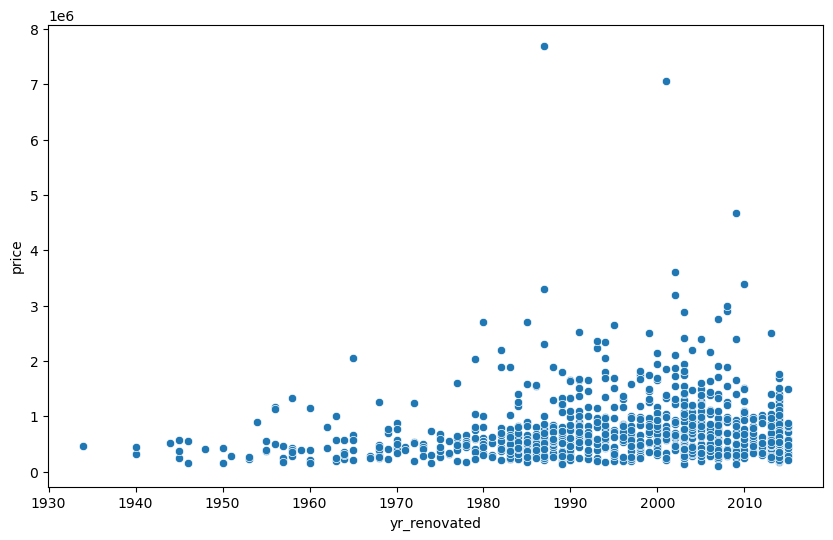

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='yr_renovated', y='price', data=df_renovated)

In [46]:
df['sqft_basement'].value_counts()

sqft_basement
0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: count, Length: 306, dtype: int64

In [47]:
# removing any properties that don't have basements
df_basements = df.drop(df[df.sqft_basement == 0].index) 
df_basements

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930,2014,5
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113,2015,4
10,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,47.6007,-122.145,2210,8925,2015,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21572,414500.0,2,1.50,1210,1278,2.0,0,0,3,8,1020,190,2007,0,47.6756,-122.375,1210,1118,2014,11
21574,1220000.0,4,3.50,4910,9444,1.5,0,0,3,11,3110,1800,2007,0,47.6502,-122.066,4560,11063,2014,5
21579,520000.0,2,2.25,1530,981,3.0,0,0,3,8,1480,50,2006,0,47.6533,-122.346,1530,1282,2014,10
21590,1010000.0,4,3.50,3510,7200,2.0,0,0,3,9,2600,910,2009,0,47.5537,-122.398,2050,6200,2015,3


<Axes: xlabel='sqft_basement', ylabel='price'>

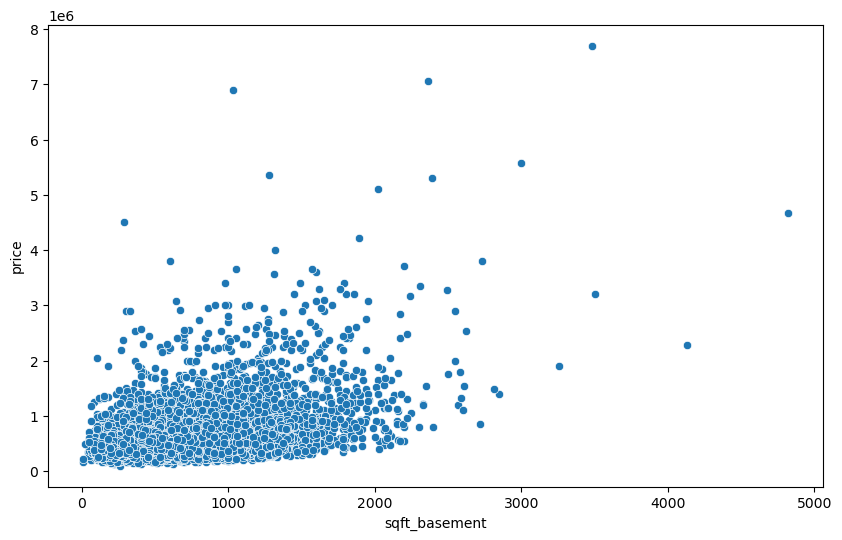

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='sqft_basement', y='price', data=df_basements)

In [49]:


# Keras regression Part 2
# Scale and split data, train and evaluate model

In [50]:

# import raw data as data frames

In [51]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [52]:

# Split data

In [53]:
# from sklearn.model_selection import train_test_splitst_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:

# Scaling, fitting & transforming data

In [56]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we don't fit test data because we don't want to assume prior information about our test set

In [57]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()

In [59]:
help(Sequential())

Help on Sequential in module keras.src.engine.sequential object:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8))
 |  model.add(tf.keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(

In [60]:
# take a look at the data to determine shape of model needed. Basic place to start is making the first layer have the
# same number of outgoing nuerons as there are features in the data set. (in this case, 19)
X_train.shape

(15117, 19)

In [61]:
model.add(Dense(19, activation='relu')) # relu = rectified linear unit, hidden activation layer f(x)=max(0,x) (outputs input, but outputs 0 for negative inputs)
model.add(Dense(19, activation='relu')) # ReLU outputs the node's input value if it is positive, and zero otherwise.
model.add(Dense(19, activation='relu')) # ReLU allows for backpropogation (but not for negative numbers) as its output's derivative has a relation to the input x.
model.add(Dense(19, activation='relu')) # ReLU is computationally efficient because not all neurons of the network are activated and needing to be computed.

model.add(Dense(1)) # Output layer has one neuron. We only need one label.

model.compile(optimizer='adam', loss='mse') # mse is the chosen loss metric because this is a regression problem and we have a 
# continuous label, price. (as opposed to a catagorical label, such as colour or country)

In [62]:
model.fit(x=X_train, y=y_train, 
          validation_data=(X_test, y_test),
         batch_size=128, epochs=400) 
# Validation data is used for an added run of checking loss as each training epoch finishes and will give more thorough 
# fedback to see if we are overfitting. 
# These comparisons will not affect the weights or biases of the model's neural network. 
# batch_size is typically a value that is a power of 2. (ex. 64, 128, 256, 512, 1024)
# epochs is an arbitrarily large size that will likely depend on the complexity of the model.

Epoch 1/400

119/119 [==============================] - 2s 4ms/step - loss: 430240104448.0000 - val_loss: 418924298240.0000
Epoch 2/400
119/119 [==============================] - 0s 3ms/step - loss: 429484933120.0000 - val_loss: 416388218880.0000
Epoch 3/400
119/119 [==============================] - 0s 3ms/step - loss: 419502718976.0000 - val_loss: 393476243456.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 368212377600.0000 - val_loss: 306476646400.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 243439517696.0000 - val_loss: 161950318592.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 125392060416.0000 - val_loss: 98321702912.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 99281068032.0000 - val_loss: 94883397632.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 97357455360.0000 - val_loss: 93548101632.0000
Epoch 9/400
119/119 

119/119 [==============================] - 0s 3ms/step - loss: 39346282496.0000 - val_loss: 38004572160.0000
Epoch 67/400
119/119 [==============================] - 0s 3ms/step - loss: 39095611392.0000 - val_loss: 37717549056.0000
Epoch 68/400
119/119 [==============================] - 0s 3ms/step - loss: 38797316096.0000 - val_loss: 37447507968.0000
Epoch 69/400
119/119 [==============================] - 0s 3ms/step - loss: 38577963008.0000 - val_loss: 37201141760.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 38349541376.0000 - val_loss: 37004451840.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 38098755584.0000 - val_loss: 36769751040.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 37923000320.0000 - val_loss: 36549558272.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 37699117056.0000 - val_loss: 36347600896.0000
Epoch 74/400
119/119 [===============

Epoch 133/400
119/119 [==============================] - 0s 3ms/step - loss: 33165692928.0000 - val_loss: 31679668224.0000
Epoch 134/400
119/119 [==============================] - 0s 3ms/step - loss: 33129031680.0000 - val_loss: 31877765120.0000
Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 33118398464.0000 - val_loss: 31618222080.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 33068648448.0000 - val_loss: 31589668864.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 33145911296.0000 - val_loss: 31685195776.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 33041696768.0000 - val_loss: 31532249088.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 32961329152.0000 - val_loss: 31476092928.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 32938758144.0000 - val_loss: 31449917440.0000
Epoch 141/400
11

119/119 [==============================] - 0s 3ms/step - loss: 31640006656.0000 - val_loss: 29865689088.0000
Epoch 200/400
119/119 [==============================] - 0s 3ms/step - loss: 31629320192.0000 - val_loss: 29912403968.0000
Epoch 201/400
119/119 [==============================] - 0s 3ms/step - loss: 31628902400.0000 - val_loss: 29887416320.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 31574749184.0000 - val_loss: 29819920384.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 31612964864.0000 - val_loss: 29844432896.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 31559870464.0000 - val_loss: 29777549312.0000
Epoch 205/400
119/119 [==============================] - 0s 3ms/step - loss: 31576432640.0000 - val_loss: 29792364544.0000
Epoch 206/400
119/119 [==============================] - 0s 3ms/step - loss: 31557318656.0000 - val_loss: 29734182912.0000
Epoch 207/400
119/119 [=======

119/119 [==============================] - 1s 4ms/step - loss: 30841559040.0000 - val_loss: 28785926144.0000
Epoch 266/400
119/119 [==============================] - 0s 3ms/step - loss: 30876057600.0000 - val_loss: 28784320512.0000
Epoch 267/400
119/119 [==============================] - 0s 3ms/step - loss: 30804682752.0000 - val_loss: 28833435648.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 30789019648.0000 - val_loss: 28819668992.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 30788130816.0000 - val_loss: 28806723584.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 30759049216.0000 - val_loss: 28783910912.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 30757480448.0000 - val_loss: 28707342336.0000
Epoch 272/400
119/119 [==============================] - 0s 3ms/step - loss: 30742560768.0000 - val_loss: 28746319872.0000
Epoch 273/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 30273353728.0000 - val_loss: 28027553792.0000
Epoch 332/400
119/119 [==============================] - 0s 4ms/step - loss: 30247395328.0000 - val_loss: 28115554304.0000
Epoch 333/400
119/119 [==============================] - 0s 4ms/step - loss: 30214047744.0000 - val_loss: 27998636032.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 30202978304.0000 - val_loss: 28019470336.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 30190665728.0000 - val_loss: 28113876992.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 30252652544.0000 - val_loss: 27978731520.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 30181548032.0000 - val_loss: 27969345536.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 30148253696.0000 - val_loss: 27952730112.0000
Epoch 339/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 29639317504.0000 - val_loss: 27329009664.0000
Epoch 398/400
119/119 [==============================] - 0s 3ms/step - loss: 29648830464.0000 - val_loss: 27285950464.0000
Epoch 399/400
119/119 [==============================] - 0s 3ms/step - loss: 29676132352.0000 - val_loss: 27289776128.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 29623269376.0000 - val_loss: 27307390976.0000


In [63]:
pd.DataFrame(model.history.history) # loss results of each epoch's training and validation.

,loss,val_loss
0,4.302401e+11,4.189243e+11
1,4.294849e+11,4.163882e+11
2,4.195027e+11,3.934762e+11
3,3.682124e+11,3.064766e+11
4,2.434395e+11,1.619503e+11
...,...,...
395,2.963682e+10,2.740155e+10
396,2.963932e+10,2.732901e+10
397,2.964883e+10,2.728595e+10
398,2.967613e+10,2.728978e+10


In [64]:
losses = pd.DataFrame(model.history.history) # loss results of each epoch's training and validation.

<Axes: >

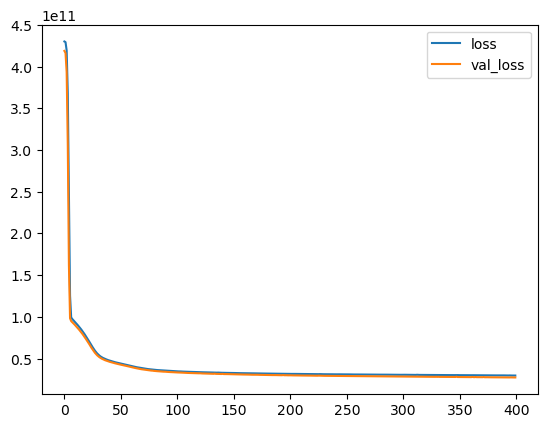

In [65]:
losses.plot() # x = epochs, y = loss. This shows if more training could be done. When the graph of both settle together 
# as the epochs progress then more training could be done to yeild a lower loss value, but maybe not by much.
# If the validation losses spike as the epoch's progress, then the model is overfitting to the training data.
# The graph here is an ideal curve.

In [66]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [67]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions)) #mse returns average error squared when comparing actual test labels to
# predicted labels, sqrt turns it into a more manageable root mean squared error.

203/203 [==============================] - 0s 1ms/step


165249.49747438738

In [68]:
mean_absolute_error(y_test, predictions) # metric average amount, in $, of how far off the predictions are 

102181.72429349922

In [69]:
# compare given error amount against average cost of house in data set.
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [70]:
# mean label value $540,296, error of 101,512 = error of nearly 20%. Not very good.

In [71]:
explained_variance_score(y_test, predictions) #How much varience is actually being explained by your model. 
                                                # 0-1, higher is better. Here, 80% is alright.Do we have a model that is better?
                                                # Could more training help? We could try since the model has been over fitting.

0.7941581507647028

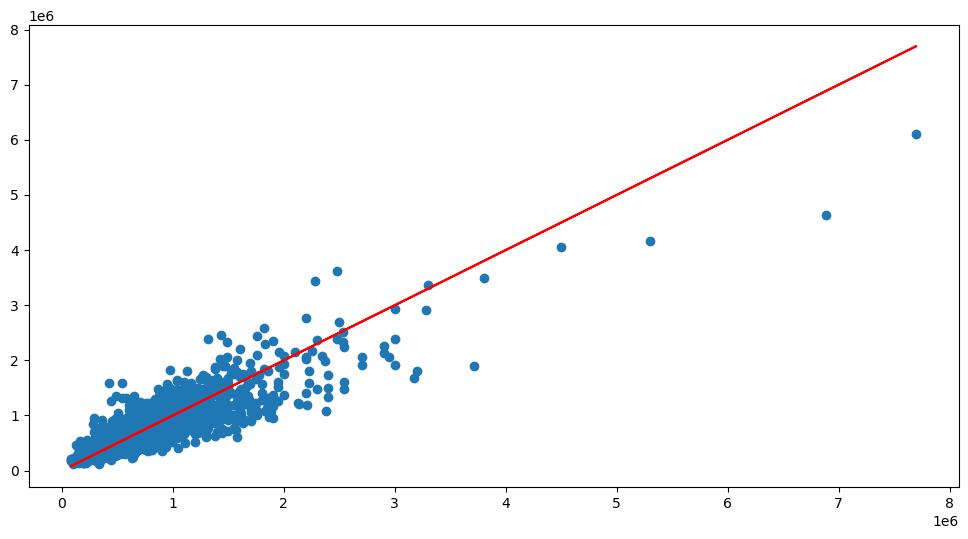

In [72]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r') # Perfect prediction line.

In [73]:
# This graph shows that from about 200,000 and below the predictions are good, so it might only be worth training more on 
# predicting values greater than 200,000, or say that the model is only good to predict values below 200,000.

In [74]:
# Take an entry from the data frame, minus its label, and see if model can predict its label value.
single_house = df.drop('price', axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1,19)) # all values (-1,) of single_house need to be reshaped 
                                                                # to match shape of data used to train model, then scaled.
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.        , 0.81818182]])

In [75]:
model.predict(single_house) # Actual label is 221,900(cost house actually sold for)

1/1 [==============================] - 0s 24ms/step


array([[278911.3]], dtype=float32)